In [1]:
# Import Dependencies
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import numpy as np

In [2]:
# Import the data
health_measures_df = pd.read_csv('Health Measures.csv', header=[0,1])
additional_measures_df = pd.read_csv('Additional Health Measures.csv', header=[0,1])

In [3]:
# Check health_measures_df
health_measures_df.head()

FIPS    State   County Premature death           \
   FIPS    State   County      Unreliable   Deaths   
0  1000  Alabama      NaN             NaN  88086.0   
1  1001  Alabama  Autauga             NaN    836.0   
2  1003  Alabama  Baldwin             NaN   3377.0   
3  1005  Alabama  Barbour             NaN    539.0   
4  1007  Alabama     Bibb             NaN    460.0   

                                                                         \
  Years of Potential Life Lost Rate 95% CI - Low 95% CI - High Quartile   
0                           10350.0      10246.0       10454.0      NaN   
1                            8027.0       7198.0        8857.0      1.0   
2                            8118.0       7667.0        8570.0      1.0   
3                           12877.0      11150.0       14604.0      4.0   
4                           11191.0       9626.0       12757.0      2.0   

                    ...                 Driving alone to work  \
  YPLL Rate (AIAN)  ... % Drive Alone (Hispanic) 95% CI - Low   
0           5967.0  ...                                  76.0   
1              NaN  ...                                   NaN   
2              NaN  ...                                  56.0   
3              NaN  ...                                   NaN   
4              NaN  ...                                   NaN   

                                                                \
  % Drive Alone (Hispanic) 95% CI - High % Drive Alone (white)   
0                                   79.0                  86.0   
1                                    NaN                  83.0   
2                                   80.0                  82.0   
3                                    NaN                  87.0   
4                                    NaN                   NaN   

                                                                          \
  % Drive Alone (white) 95% CI - Low % Drive Alone (white) 95% CI - High   
0                               86.0                                86.0   
1                               78.0                                89.0   
2                               80.0                                83.0   
3                               83.0                                90.0   
4                                NaN                                 NaN   

  Long commute - driving alone                                             \
     # Workers who Drive Alone % Long Commute - Drives Alone 95% CI - Low   
0                      2095195                            35         35.0   
1                        24949                            41         36.0   
2                        97098                            38         35.0   
3                         8555                            37         31.0   
4                         8107                            55         47.0   

                          
  95% CI - High Quartile  
0          36.0      NaN  
1          45.0      3.0  
2          41.0      2.0  
3          42.0      2.0  
4          63.0      4.0  

[5 rows x 249 columns]

In [4]:
# Check additional_measures_df
additional_measures_df.head()

FIPS    State   County      COVID-19 age-adjusted mortality  \
   FIPS    State   County # deaths due to COVID-19 during 2020   
0  1000  Alabama      NaN                               6544.0   
1  1001  Alabama  Autauga                                 55.0   
2  1003  Alabama  Baldwin                                165.0   
3  1005  Alabama  Barbour                                 38.0   
4  1007  Alabama     Bibb                                 40.0   

                      Life expectancy                             \
  COVID-19 death rate Life Expectancy 95% CI - Low 95% CI - High   
0               104.0            74.8         74.8          74.9   
1                82.0            76.6         75.8          77.3   
2                50.0            77.7         77.3          78.1   
3               110.0            72.9         71.6          74.1   
4               147.0            73.6         72.4          74.8   

                                                              ... % Hispanic  \
  Life Expectancy (AIAN) Life Expectancy (AIAN) 95% CI - Low  ... % Hispanic   
0                  111.8                                99.3  ...        4.6   
1                    NaN                                 NaN  ...        3.1   
2                  104.6                                67.6  ...        4.6   
3                    NaN                                 NaN  ...        4.7   
4                    NaN                                 NaN  ...        2.9   

  % non-Hispanic white                      % not proficient in English  \
  # Non-Hispanic white % Non-Hispanic white # Not Proficient in English   
0              3205777                 65.1                       46887   
1                41079                 73.2                         363   
2               191015                 83.3                        1593   
3                11130                 45.3                         433   
4                16420                 74.2                          75   

                                                         % female  \
  % Not Proficient in English 95% CI - Low 95% CI - High % female   
0                           1          1.0           1.0     51.7   
1                           1          0.0           1.0     51.5   
2                           1          0.0           1.0     51.6   
3                           2          1.0           3.0     47.2   
4                           0          0.0           1.0     46.8   

            % rural          
  # rural residents % rural  
0         1957932.0    41.0  
1           22921.0    42.0  
2           77060.0    42.3  
3           18613.0    67.8  
4           15663.0    68.4  

[5 rows x 289 columns]

In [5]:
# display the shape of the dataframes
print(f' Health Measures has {health_measures_df.shape[0]} rows and {health_measures_df.shape[1]} columns')
print(f' Additional Measures has {additional_measures_df.shape[0]} rows and {additional_measures_df.shape[1]} columns')

 Health Measures has 3193 rows and 249 columns
 Additional Measures has 3193 rows and 289 columns


In [12]:
# health measures null values
health_nulls = health_measures_df.isnull().sum()
for key, value in health_nulls.iteritems():
    if value != 0:
        print(key, ',', value)

('County', 'County') , 51
('Premature death', 'Unreliable') , 2976
('Premature death', 'Deaths') , 277
('Premature death', 'Years of Potential Life Lost Rate') , 277
('Premature death', '95% CI - Low') , 277
('Premature death', '95% CI - High') , 277
('Premature death', 'Quartile') , 111
('Premature death', 'YPLL Rate (AIAN)') , 2956
('Premature death', 'YPLL Rate (AIAN) 95% CI - Low') , 2956
('Premature death', 'YPLL Rate (AIAN) 95% CI - High') , 2956
('Premature death', 'YPLL Rate (AIAN) Unreliable') , 3189
('Premature death', 'YPLL Rate (Asian)') , 2890
('Premature death', 'YPLL Rate (Asian) 95% CI - Low') , 2890
('Premature death', 'YPLL Rate (Asian) 95% CI - High') , 2890
('Premature death', 'YPLL Rate (Asian) Unreliable') , 3192
('Premature death', 'YPLL Rate (Black)') , 2074
('Premature death', 'YPLL Rate (Black) 95% CI - Low') , 2074
('Premature death', 'YPLL Rate (Black) 95% CI - High') , 2074
('Premature death', 'YPLL Rate (Black) Unreliable') , 3193
('Premature death', 'YPLL

In [13]:
# additional measures null values
additional_nulls = additional_measures_df.isnull().sum()
for key, value in additional_nulls.iteritems():
    if value != 0:
        print(key, ',', value)

('County', 'County') , 51
('COVID-19 age-adjusted mortality', '# deaths due to COVID-19 during 2020') , 578
('COVID-19 age-adjusted mortality', 'COVID-19 death rate') , 578
('Life expectancy', 'Life Expectancy') , 70
('Life expectancy', '95% CI - Low') , 70
('Life expectancy', '95% CI - High') , 70
('Life expectancy', 'Life Expectancy (AIAN)') , 2828
('Life expectancy', 'Life Expectancy (AIAN) 95% CI - Low') , 2828
('Life expectancy', 'Life Expectancy (AIAN) 95% CI - High') , 2828
('Life expectancy', 'Life Expectancy (Asian)') , 2544
('Life expectancy', 'Life Expectancy (Asian) 95% CI - Low') , 2544
('Life expectancy', 'Life Expectancy (Asian) 95% CI - High') , 2544
('Life expectancy', 'Life Expectancy (Black)') , 1815
('Life expectancy', 'Life Expectancy (Black) 95% CI - Low') , 1815
('Life expectancy', 'Life Expectancy (Black) 95% CI - High') , 1815
('Life expectancy', 'Life Expectancy (Hispanic)') , 1901
('Life expectancy', 'Life Expectancy (Hispanic) 95% CI - Low') , 1901
('Life ex

In [8]:
#  health measures data types and non-null values
print(health_measures_df.info(verbose=True, show_counts=True))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3193 entries, 0 to 3192
Data columns (total 249 columns):
 #    Column                                                                          Non-Null Count  Dtype  
---   ------                                                                          --------------  -----  
 0    (FIPS, FIPS)                                                                    3193 non-null   int64  
 1    (State, State)                                                                  3193 non-null   object 
 2    (County, County)                                                                3142 non-null   object 
 3    (Premature death, Unreliable)                                                   217 non-null    object 
 4    (Premature death, Deaths)                                                       2916 non-null   float64
 5    (Premature death, Years of Potential Life Lost Rate)                            2916 non-null   float64
 6    (Prema

In [9]:
#  additional measures data types and non-null values
print(additional_measures_df.info(verbose=True, show_counts=True))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3193 entries, 0 to 3192
Data columns (total 289 columns):
 #    Column                                                                                    Non-Null Count  Dtype  
---   ------                                                                                    --------------  -----  
 0    (FIPS, FIPS)                                                                              3193 non-null   int64  
 1    (State, State)                                                                            3193 non-null   object 
 2    (County, County)                                                                          3142 non-null   object 
 3    (COVID-19 age-adjusted mortality, # deaths due to COVID-19 during 2020)                   2615 non-null   float64
 4    (COVID-19 age-adjusted mortality, COVID-19 death rate)                                    2615 non-null   float64
 5    (Life expectancy, Life Expectancy)            

In [10]:
# health measures summary statistics
health_measures_df.describe()

FIPS Premature death                                    \
               FIPS          Deaths Years of Potential Life Lost Rate   
count   3193.000000     2916.000000                       2916.000000   
mean   30360.922643     2825.679698                       8970.947874   
std    15171.912105    15327.282388                       2895.238589   
min     1000.000000       37.000000                       3090.000000   
25%    18173.000000      241.000000                       6953.250000   
50%    29175.000000      510.500000                       8596.000000   
75%    45075.000000     1267.000000                      10541.500000   
max    56045.000000   378883.000000                      30008.000000   

                                                                 \
       95% CI - Low 95% CI - High     Quartile YPLL Rate (AIAN)   
count   2916.000000   2916.000000  3082.000000       237.000000   
mean    7600.622085  10384.466392     2.459442     15770.206751   
std     2504.053615   3509.143557     1.116898      8403.487021   
min     2194.000000   3337.000000     1.000000      2897.000000   
25%     5879.500000   7980.000000     1.000000     10038.000000   
50%     7341.000000   9938.000000     2.000000     14560.000000   
75%     8980.500000  12228.000000     3.000000     19556.000000   
max    23686.000000  40284.000000     5.000000     51024.000000   

                                                                    \
      YPLL Rate (AIAN) 95% CI - Low YPLL Rate (AIAN) 95% CI - High   
count                    237.000000                     237.000000   
mean                   12248.810127                   19910.447257   
std                     6725.100609                   10865.862678   
min                     1421.000000                    3626.000000   
25%                     7439.000000                   12918.000000   
50%                    11282.000000                   18226.000000   
75%                    15570.000000                   24502.000000   
max                    37035.000000                   73744.000000   

                         ...                 Driving alone to work  \
      YPLL Rate (Asian)  ... % Drive Alone (Hispanic) 95% CI - Low   
count        303.000000  ...                           1319.000000   
mean        3650.676568  ...                             64.001516   
std         1493.081686  ...                             11.709431   
min         1207.000000  ...                              0.000000   
25%         2700.500000  ...                             59.000000   
50%         3292.000000  ...                             66.000000   
75%         4256.500000  ...                             72.000000   
max        15968.000000  ...                             91.000000   

                                                                    \
      % Drive Alone (Hispanic) 95% CI - High % Drive Alone (white)   
count                            1319.000000           1759.000000   
mean                               80.298711             80.122797   
std                                10.317432              7.769045   
min                                 3.000000             10.000000   
25%                                75.000000             78.000000   
50%                                81.000000             81.000000   
75%                                87.000000             85.000000   
max                               100.000000             98.000000   

                                                                              \
      % Drive Alone (white) 95% CI - Low % Drive Alone (white) 95% CI - High   
count                        1759.000000                         1759.000000   
mean                           76.680500                           83.502558   
std                             8.640146                            7.901186   
min                             4.000000                           10.000000   
25%                           

In [11]:
# additional measures summary statistics
additional_measures_df.describe()

FIPS      COVID-19 age-adjusted mortality                      \
               FIPS # deaths due to COVID-19 during 2020 COVID-19 death rate   
count   3193.000000                          2615.000000         2615.000000   
mean   30360.922643                           267.313958           99.289484   
std    15171.912105                          1513.174017           58.353997   
min     1000.000000                            10.000000            7.000000   
25%    18173.000000                            22.000000           62.000000   
50%    29175.000000                            43.000000           88.000000   
75%    45075.000000                            97.000000          121.000000   
max    56045.000000                         35735.000000          769.000000   

      Life expectancy                                                    \
      Life Expectancy 95% CI - Low 95% CI - High Life Expectancy (AIAN)   
count     3123.000000  3123.000000   3123.000000             365.000000   
mean        76.916843    75.578034     78.254691              79.232329   
std          3.251295     3.302866      3.732488              14.710890   
min         61.100000    56.900000     64.500000              54.900000   
25%         74.900000    73.500000     76.100000              69.700000   
50%         77.000000    75.700000     78.200000              75.100000   
75%         78.900000    77.800000     80.100000              84.900000   
max        112.500000    92.200000    156.900000             146.800000   

                                           \
      Life Expectancy (AIAN) 95% CI - Low   
count                          365.000000   
mean                            71.950137   
std                              8.894256   
min                             52.800000   
25%                             66.600000   
50%                             71.300000   
75%                             76.200000   
max                            109.800000   

                                                                    ...  \
      Life Expectancy (AIAN) 95% CI - High Life Expectancy (Asian)  ...   
count                           365.000000              649.000000  ...   
mean                             86.511507               87.729276  ...   
std                              23.082518                4.654333  ...   
min                              57.000000               69.000000  ...   
25%                              72.500000               85.000000  ...   
50%                              78.500000               87.500000  ...   
75%                              92.200000               89.800000  ...   
max                             211.400000              106.900000  ...   

        % Hispanic % non-Hispanic white                       \
        % Hispanic # Non-Hispanic white % Non-Hispanic white   
count  3193.000000         3.193000e+03          3193.000000   
mean      9.973692         1.232530e+05            75.389728   
std      13.871579         6.493624e+05            20.237009   
min       0.600000         2.300000e+01             2.700000   
25%       2.600000         8.015000e+03            63.500000   
50%       4.700000         2.040800e+04            82.600000   
75%      10.400000         5.701900e+04            91.800000   
max      96.300000         1.414708e+07            97.600000   

      % not proficient in English                                           \
      # Not Proficient in English % Not Proficient in English 95% CI - Low   
count                3.193000e+03                 3193.000000  3070.000000   
mean                 7.996761e+03                    1.601002     0.946906   
std                  8.309842e+04                    2.717925     2.165094   
min                  0.000000e+00                    0.000000     0.000000   
25%                  3.900000e+01                    0.000000     0.000000   
50%                  1.790000e+02                    1.000000     0.000000

<AxesSubplot:xlabel='None-None', ylabel='None-None'>

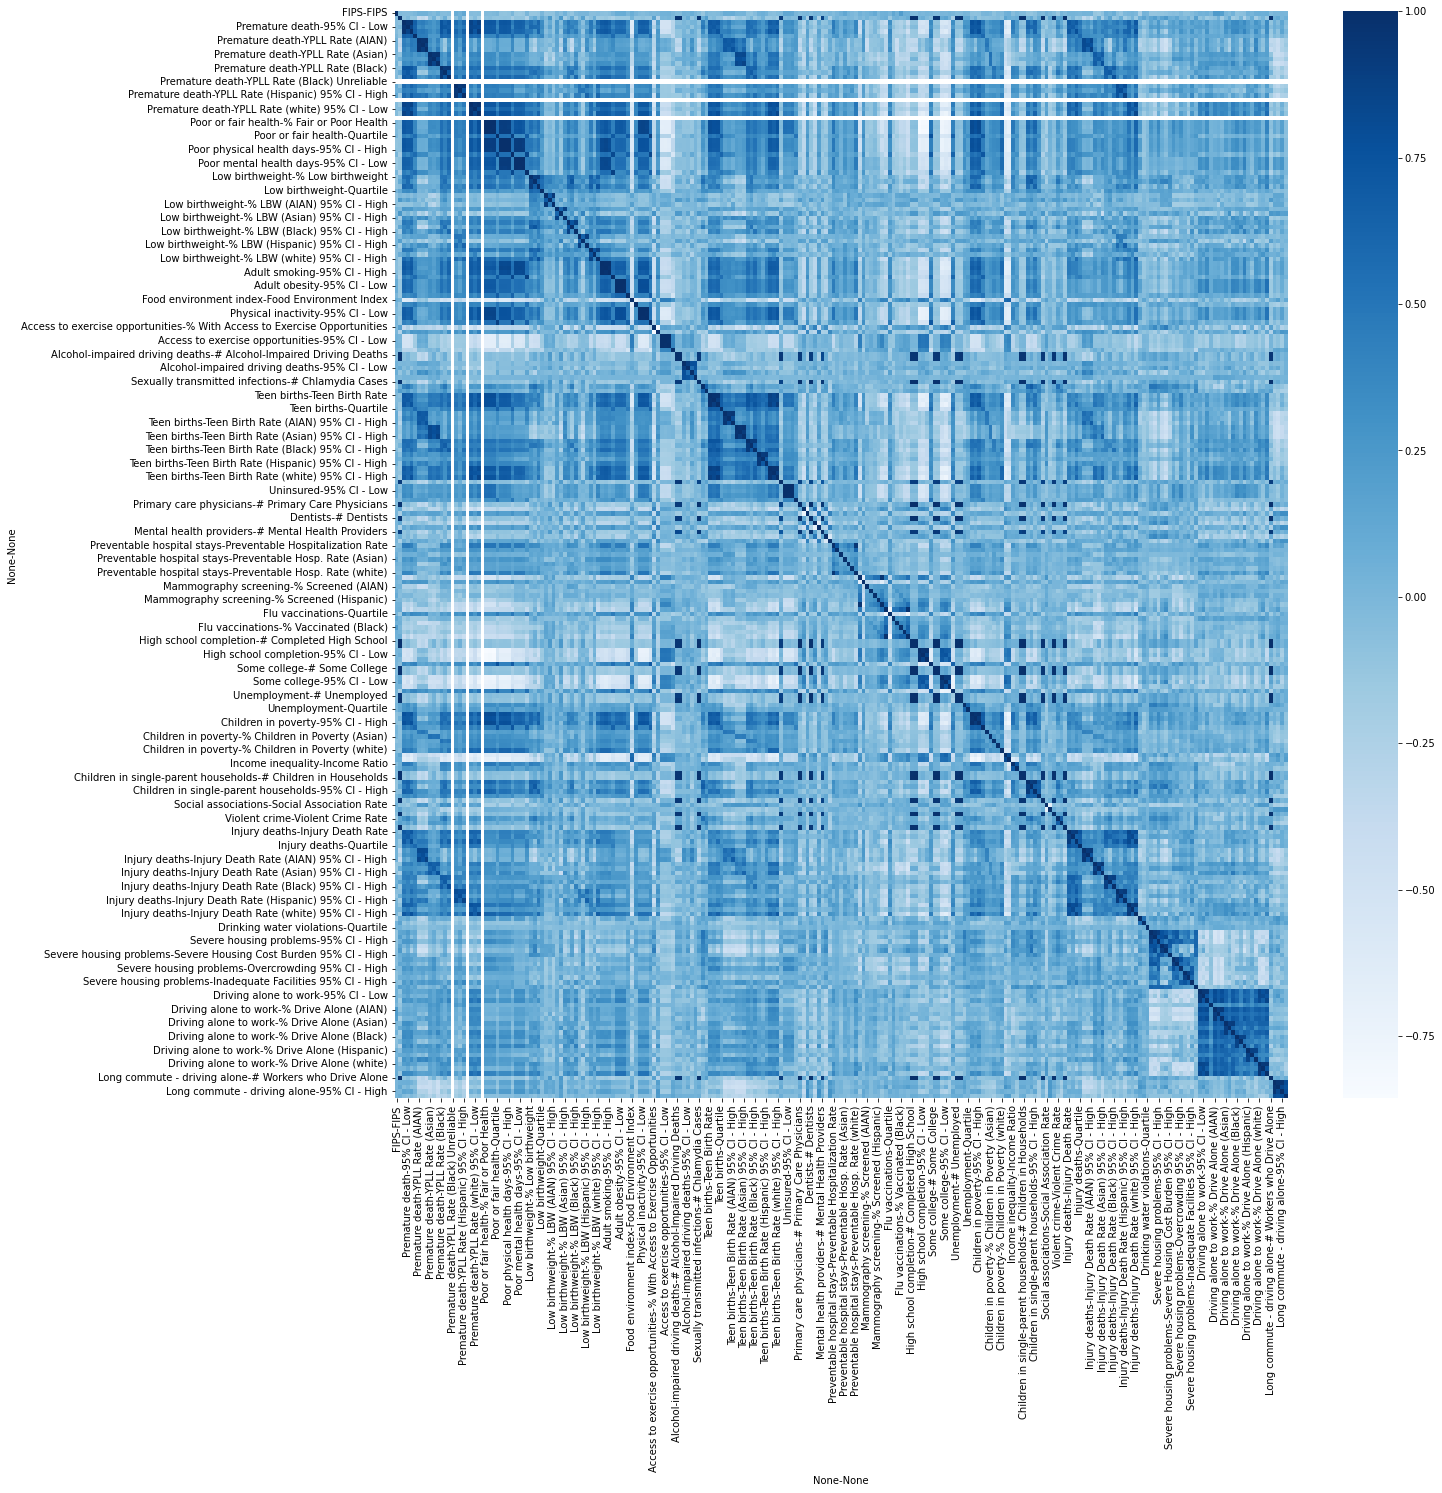

In [16]:
plt.figure(figsize=(20,20))
sns.heatmap(health_measures_df.corr(), cmap='Blues')